# Week 8 assignment: NLP on social media data

Take our social media we collected last week and:

- extract the sentiment scores of the titles of the posts
    - you can use the keyword method, Python packages, or other methods to extract the sentiment scores
- plot a histogram of the sentiment scores
- look at descriptive statistics (mean, median, standard deviation) of the sentiment scores
- examine the text for some of the highest and lowest sentiment scores
- write a short analysis of the results and our process, as well as propose one idea for something we could use this data for

Optional advanced challenges:
- Compare different sentiment analysis methods (e.g. textblob and VADER). Does one seem to work better than another?
- Get the sentiments of the comments for each post. We can do a lot with this, such as:
    - look at the average sentiment for each post and compare it with the sentiment of the title and/or text
    - look at the distribution of sentiments for each post and find the posts with the widest range of sentiments (controversial posts)
- Examine the subjectivity of our data (e.g. using textblob)
- Use topic modeling on the posts
    - you can also add in the comments to the topic model
- Look at the most frequent words for positive and negative sentiment posts

Note: There is no assignment solution file for this week.

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib as plt
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
#Load post titles
con = sqlite3.connect('Week7_co_reddit.sqlite')
df_title = pd.read_sql_query('SELECT * FROM posts;', con)
con.close()
df_title.head()

,index,title,link,author,n_comments,score,text,post_id,dt_created
0,0,FreeRossDAO has raised 1000+ ETH. Powerful Eth...,/r/ethereum/comments/r9frxg/freerossdao_has_ra...,sassypersona16,8,122,https://twitter.com/TrashbagsCash/status/14674...,r9frxg,2021/12/05 08:30:59
1,1,Satoshi owns 5.2% of all the bitcoin supply an...,/r/ethereum/comments/r90qoy/satoshi_owns_52_of...,Historian_investor,414,993,.23% of all ethereum supply,r90qoy,2021/12/04 17:23:57
2,2,$13 million of stolen ETH is being sold right ...,/r/ethereum/comments/r94obk/13_million_of_stol...,sandygws,68,177,$13 million of stolen ETH being sold live righ...,r94obk,2021/12/04 20:51:12
3,3,Ethereum showing relative market strength comp...,/r/ethereum/comments/r9bvvb/ethereum_showing_r...,WhalesHeaven,6,40,"This isn't a price discussion post, but rather...",r9bvvb,2021/12/05 04:10:57
4,4,Ethereum for beginners,/r/ethereum/comments/r9h8ri/ethereum_for_begin...,Artistic_Dwilko,1,10,,r9h8ri,2021/12/05 09:49:44


In [3]:
#Load post comments
con = sqlite3.connect('Week7_co_reddit.sqlite')
df_comment = pd.read_sql_query('SELECT * FROM comments;', con)
con.close()
df_comment.head()

,index,author,score,text,post_id
0,0,Sutied,2,If I only had 100 ETH to donate lmao,r9frxg
1,1,ProfessorCrumbledore,2,Could have almost bought a pardon a year ago w...,r9frxg
2,2,DonLemonAIDS,2,Of all the valid objects of sympathy out there...,r9frxg
3,3,atxdevdude,57,I mean clearly Vitalik would make less of an i...,r90qoy
4,4,hesiod2,44,For context: Jeff Bezos owns 10% of Amazon. Z...,r90qoy


In [4]:
analyzer = SentimentIntensityAnalyzer()

### 1. Extract the sentiment scores of the titles of the posts (and comments)

In [5]:
i=0 #reset counter for loop

#initialize variables
my_vader_score_compound = [ ] 
my_vader_score_positive = [ ] 
my_vader_score_negative = [ ] 
my_vader_score_neutral = [ ] 

while (i<len(df_title)):

    my_analyzer = analyzer.polarity_scores(df_title.iloc[i]['title'])
    my_vader_score_compound.append(my_analyzer['compound'])
    my_vader_score_positive.append(my_analyzer['pos'])
    my_vader_score_negative.append(my_analyzer['neg']) 
    my_vader_score_neutral.append(my_analyzer['neu']) 

    i = i + 1

#converting sentiment values to numpy for easier usage
my_vader_score_compound = np.array(my_vader_score_compound)
my_vader_score_positive = np.array(my_vader_score_positive)
my_vader_score_negative = np.array(my_vader_score_negative)
my_vader_score_neutral = np.array(my_vader_score_neutral)


df_title['Compositie score'] = my_vader_score_compound
df_title['Positive Score'] = my_vader_score_positive
df_title['Negative Score'] = my_vader_score_negative
df_title['Neutral Score'] = my_vader_score_neutral

i=0 #reset counter for loop

#initialize variables
my_prediction = [ ] 

while (i<len(df_title)):
    if ((df_title.iloc[i]['Compositie score'] >= 0.3)):
        my_prediction.append('Positive Score')
    elif ((df_title.iloc[i]['Compositie score'] >= 0) & (df_title.iloc[i]['Compositie score'] < 0.3)):
        my_prediction.append('Neutral Score')
    elif ((df_title.iloc[i]['Compositie score'] < 0)):
        my_prediction.append('Negative Score') 

    i = i+1
    
df_title['Sentiment'] = my_prediction
    
df_title_sentiment = df_title[['index', 'title', 'Compositie score', 'Positive Score', 'Negative Score', 'Neutral Score', 'Sentiment']]

In [6]:
df_title_sentiment.head()

,index,title,Compositie score,Positive Score,Negative Score,Neutral Score,Sentiment
0,0,FreeRossDAO has raised 1000+ ETH. Powerful Eth...,0.4753,0.306,0.000,0.694,Positive Score
1,1,Satoshi owns 5.2% of all the bitcoin supply an...,0.1280,0.078,0.066,0.856,Neutral Score
2,2,$13 million of stolen ETH is being sold right ...,-0.4939,0.000,0.158,0.842,Negative Score
3,3,Ethereum showing relative market strength comp...,0.8166,0.346,0.000,0.654,Positive Score
4,4,Ethereum for beginners,0.0000,0.000,0.000,1.000,Neutral Score


In [7]:
i=0 #reset counter for loop

#initialize variables
my_vader_score_compound = [ ] 
my_vader_score_positive = [ ] 
my_vader_score_negative = [ ] 
my_vader_score_neutral = [ ] 

while (i<len(df_comment)):

    my_analyzer = analyzer.polarity_scores(df_comment.iloc[i]['text'])
    my_vader_score_compound.append(my_analyzer['compound'])
    my_vader_score_positive.append(my_analyzer['pos'])
    my_vader_score_negative.append(my_analyzer['neg']) 
    my_vader_score_neutral.append(my_analyzer['neu']) 

    i = i + 1

#converting sentiment values to numpy for easier usage
my_vader_score_compound = np.array(my_vader_score_compound)
my_vader_score_positive = np.array(my_vader_score_positive)
my_vader_score_negative = np.array(my_vader_score_negative)
my_vader_score_neutral = np.array(my_vader_score_neutral)


df_comment['Compositie score'] = my_vader_score_compound
df_comment['Positive Score'] = my_vader_score_positive
df_comment['Negative Score'] = my_vader_score_negative
df_comment['Neutral Score'] = my_vader_score_neutral

i=0 #reset counter for loop


#initialize variables
my_prediction = [ ] 

while (i<len(df_comment)):
    if ((df_comment.iloc[i]['Compositie score'] >= 0.3)):
        my_prediction.append('Positive Score')
    elif ((df_comment.iloc[i]['Compositie score'] >= 0) & (df_comment.iloc[i]['Compositie score'] < 0.3)):
        my_prediction.append('Neutral Score')
    elif ((df_comment.iloc[i]['Compositie score'] < 0)):
        my_prediction.append('Negative Score') 

    i = i+1
    
df_comment['Sentiment'] = my_prediction

df_comment_sentiment = df_comment[['index', 'text', 'Compositie score', 'Positive Score', 'Negative Score', 'Neutral Score', 'Sentiment']]

In [8]:
df_comment_sentiment.head()

,index,text,Compositie score,Positive Score,Negative Score,Neutral Score,Sentiment
0,0,If I only had 100 ETH to donate lmao,0.5994,0.328,0.0,0.672,Positive Score
1,1,Could have almost bought a pardon a year ago w...,0.2585,0.145,0.0,0.855,Neutral Score
2,2,Of all the valid objects of sympathy out there...,0.3612,0.172,0.0,0.828,Positive Score
3,3,I mean clearly Vitalik would make less of an i...,0.4019,0.213,0.0,0.787,Positive Score
4,4,For context: Jeff Bezos owns 10% of Amazon. Z...,0.6557,0.137,0.0,0.863,Positive Score


### 2. Plot a histogram of the sentiment scores
### 3. Look at descriptive statistics (mean, median, standard deviation) of the sentiment scores

<AxesSubplot:ylabel='Frequency'>

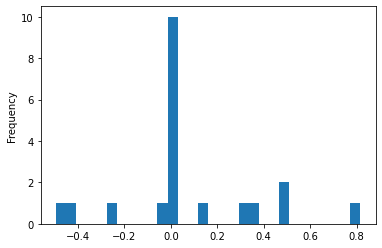

In [9]:
#Plot title sentiments
df_title_sentiment['Compositie score'].plot.hist(bins=30)

In [10]:
#View descriptive statistics for title scores
df_title_sentiment.drop('index', axis=1).describe()

,Compositie score,Positive Score,Negative Score,Neutral Score
count,20.000000,20.000000,20.000000,20.000000
mean,0.065645,0.068100,0.064350,0.867550
std,0.307701,0.119293,0.135053,0.163861
min,-0.493900,0.000000,0.000000,0.455000
25%,0.000000,0.000000,0.000000,0.729000
50%,0.000000,0.000000,0.000000,0.945000
75%,0.175550,0.093750,0.077000,1.000000
max,0.816600,0.346000,0.545000,1.000000


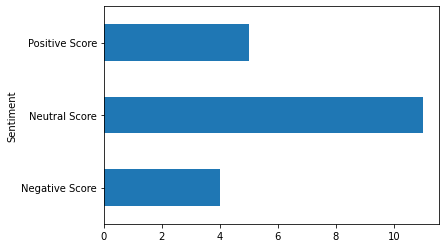

In [11]:
#View distribution of sentiment in title
df_title_sentiment.groupby('Sentiment').size().plot(kind='barh');

<AxesSubplot:ylabel='Frequency'>

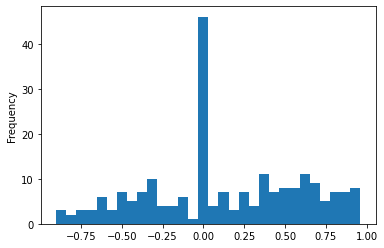

In [12]:
#Plot comment sentiments
df_comment_sentiment['Compositie score'].plot.hist(bins=30)

In [13]:
#View descriptive statistics for comment scores
df_comment_sentiment.drop('index', axis=1).describe()

,Compositie score,Positive Score,Negative Score,Neutral Score
count,216.000000,216.000000,216.000000,216.000000
mean,0.130722,0.116829,0.090935,0.792241
std,0.471969,0.136766,0.143392,0.178757
min,-0.902000,0.000000,0.000000,0.116000
25%,-0.205925,0.000000,0.000000,0.685750
50%,0.012900,0.090000,0.000000,0.820500
75%,0.544200,0.190250,0.119500,0.925250
max,0.961300,0.884000,0.773000,1.000000


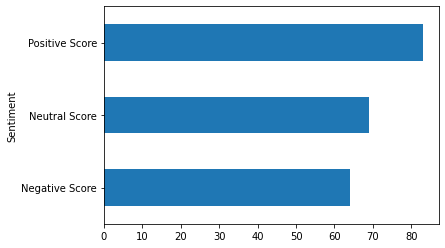

In [14]:
#View distribution of sentiment in comments
df_comment_sentiment.groupby('Sentiment').size().plot(kind='barh');

#### 4. Examine the text for some of the highest and lowest sentiment scores

In [15]:
#Lowest sentiment scores
df_comment_sentiment.sort_values(by='Compositie score')['text'].to_list()[:10]

['WTF would percentage ownership have to do with this? .23% of $500B is $1.15B\n\nAm I missing something or is this stupid AF?',
 'It depends on your viewpoint.  \n\nAs the creator of the block its the moment your machine validates the block.\n\nAs other fullnode operators its when their machines validate the block.\n\nIn general you would want the block accepted by at least 51% of the network, and have at least one other block built on it.\n\nThere is no "official" in decentralized & permissionless systems, only "consensus".',
 'I think you could risk an out of gas error where it fails and you lose gas money',
 "ooooh weird it hasn't been processed yet when the gas price was at 200 and you put 33... Bad news for you, probably the tx will fail and you will lose the gas fee used (and you deserve this).",
 'It doesn’t matter if satoshi were to sell, and if there was a dip everyone would be buying it. No one person or entity can control bitcoin so, I don’t give a fuck who satoshi is or wh

In [16]:
#Highest sentiment scores
df_comment_sentiment.sort_values(by='Compositie score', ascending=False)['text'].to_list()[:10]

['Hi! I recently started working with solidity has a hobbie. Is not my primary language but the semantics are so rich that it doesn’t bother if you coming from a OOP background. If you been programming in Java then solidity is not going to be difficult for you, but you need to understand that smart contracts are not always objects, as you would declare in a Java or c class.\n\nHappy to answer more questions if so, I’m not expert but somehow we can help each other :)',
 'Go read something and listen to a few podcasts.  Or better yet, buy a small amount of the top ten currencies and try to use them and do things with them and come to your own conclusions about their strengths and weaknesses.  If you can afford to burn a couple hundred dollars moving stuff around and experimenting it’s the best education on the subject that you can buy.  You’ll have answers to all of your questions by the time you are done.  A lot of people holding these things are just investors / gamblers not actual use

### Compare Vader to TextBlob

In [17]:
def get_tb_sentiment(text):
    tb = TextBlob(text)
    return tb.sentiment[0]

#Perform analysis on text column using TextBlob
df_comment_sentiment['Score_tb'] = df_comment_sentiment['text'].apply(get_tb_sentiment)

C:\Users\jwkon\AppData\Local\Temp/ipykernel_4808/691044810.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comment_sentiment['Score_tb'] = df_comment_sentiment['text'].apply(get_tb_sentiment)


In [19]:
df_comment_sentiment.head()

,index,text,Compositie score,Positive Score,Negative Score,Neutral Score,Sentiment,Score_tb
0,0,If I only had 100 ETH to donate lmao,0.5994,0.328,0.0,0.672,Positive Score,0.300000
1,1,Could have almost bought a pardon a year ago w...,0.2585,0.145,0.0,0.855,Neutral Score,0.000000
2,2,Of all the valid objects of sympathy out there...,0.3612,0.172,0.0,0.828,Positive Score,0.000000
3,3,I mean clearly Vitalik would make less of an i...,0.4019,0.213,0.0,0.787,Positive Score,-0.094792
4,4,For context: Jeff Bezos owns 10% of Amazon. Z...,0.6557,0.137,0.0,0.863,Positive Score,-0.006111


In [20]:
i=0 #reset counter for loop

my_prediction = [ ] 

while (i<len(df_comment_sentiment)):
    if ((df_comment_sentiment.iloc[i]['Score_tb'] >= 0.3)):
        my_prediction.append('Positive Score')
    elif ((df_comment_sentiment.iloc[i]['Score_tb'] >= 0) & (df_comment_sentiment.iloc[i]['Score_tb'] < 0.3)):
        my_prediction.append('Neutral Score')
    elif ((df_comment_sentiment.iloc[i]['Score_tb'] < 0)):
        my_prediction.append('Negative Score') 

    i = i+1
    
df_comment_sentiment['Sentiment_tb'] = my_prediction


#Create dataframe for only text and sentiment columns
df_comment_complete_sentiment = df_comment_sentiment[['text', 'Sentiment', 'Sentiment_tb']]
df_comment_complete_scores = df_comment_sentiment[['text', 'Compositie score', 'Score_tb']]

C:\Users\jwkon\AppData\Local\Temp/ipykernel_4808/2633099374.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comment_sentiment['Sentiment_tb'] = my_prediction


In [23]:
#Preview sentiment dataframe
df_comment_complete_sentiment.head()

,text,Sentiment,Sentiment_tb
0,If I only had 100 ETH to donate lmao,Positive Score,Positive Score
1,Could have almost bought a pardon a year ago w...,Neutral Score,Neutral Score
2,Of all the valid objects of sympathy out there...,Positive Score,Neutral Score
3,I mean clearly Vitalik would make less of an i...,Positive Score,Negative Score
4,For context: Jeff Bezos owns 10% of Amazon. Z...,Positive Score,Negative Score


#### Compare VADER and TextBlob scores

In [24]:
#Descriptive statistics
df_comment_complete_scores.describe()

,Compositie score,Score_tb
count,216.000000,216.000000
mean,0.130722,0.045379
std,0.471969,0.281117
min,-0.902000,-1.000000
25%,-0.205925,-0.016964
50%,0.012900,0.000000
75%,0.544200,0.185417
max,0.961300,1.000000


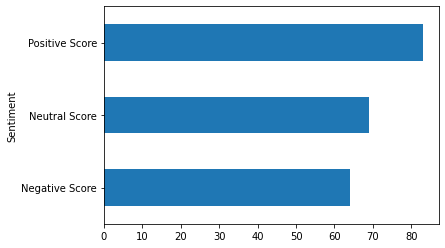

In [26]:
#View distribution of sentiment values from VADER
df_comment_complete_sentiment.groupby('Sentiment').size().plot(kind='barh');

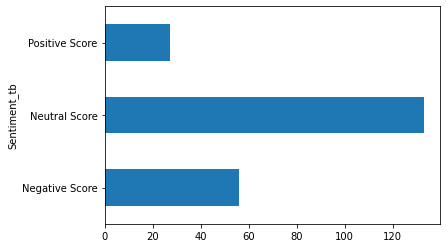

In [27]:
#View distribution of sentiment values from TextBlob
df_comment_complete_sentiment.groupby('Sentiment_tb').size().plot(kind='barh');

# Summary

Analyzing the Ethereum subreddit data was easier than gathering the data. I’ve done a sentiment analysis in the past but was continually faced with data structure-related issues; this was not the case for this assignment. The process was straightforward, and I encountered very few errors. The results matched my expectations as the market had a particularly volatile week. Still, the price of ETH (Ethereum’s main asset) held up comparatively well. The bar chart of comment sentiment showed a higher count of positive sentiment. When looking at the comments with the lowest sentiment, they appeared not to be directed toward ETH but on other blockchain ecosystems. 
I compared VADER to TextBlob, and the TextBlob results showed a very high count for Neutral sentiment values while Positive values were the lowest. If I had been doing this for a client or a project I’m working on, I would rely on VADER to analyze my data since the results aligned more with what I saw in the text. We could use this data to gauge market conditions, specifically for a specific asset, to view the sentiment within a single ecosystem when investor anxiety is high. 
